## **Data Dictionary:**

### **The dataset consists of 10 numerical and 8 categorical attributes.** 
- The **Revenue** attribute is used as the target label. 
- **Administrative**, **Administrative Duration**, **Informational**, **Informational Duration**, **Product Related** and **Product Related Duration** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
- The **Bounce Rate**, **Exit Rate** and **Page Value** features represent the metrics measured by **Google Analytics** for each page in the e-commerce site. 
- The value of **Bounce Rate** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (**bounce**) without triggering any other requests to the analytics server during that session. 
- The value of **Exit Rate** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
- The **Page Value** feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The **Special Day** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## **Business Problem:**
- The recent surge in online shopping has given the business world a new dimension. People frequently search the internet for the products they require and purchase them through online transactions. 
- It has made their lives more convenient and comfortable. 
- Simultaneously, the sellers must understand the patterns and intentions of the customers.

## **Objective**
- Objective here is to build a Machine Learning model that can help in predicting whether a customer will purchase or not.

## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from lightgbm import LGBMClassifier
from sklearn import metrics

## **Loading Data**

In [3]:
data = pd.read_csv('/content/training_data.csv')
data.shape

(9864, 18)

## **Exploratory Data Analysis**

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.0,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.0,0.0,May,3,3,4,2,New_Visitor,True,0
4,4,37.25,1,5.0,50,1295.008333,0.000893,0.015595,0.0,0.0,Nov,3,2,4,2,Returning_Visitor,True,1


In [5]:
data.describe() # data description

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2.301906,79.932422,0.492498,33.723487,31.724047,1189.601572,0.022265,0.043117,5.858316,0.060645,2.125101,2.363037,3.138281,4.054542,0.154704
std,3.312831,173.310874,1.252128,137.813445,44.342798,1820.278385,0.048563,0.048575,18.620643,0.197870,0.907103,1.730469,2.401278,4.014430,0.361641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.625000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,607.544643,0.003175,0.025309,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.770833,0.000000,0.000000,38.000000,1471.893750,0.017077,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,2720.500000,24.000000,2252.033333,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
data.isnull().sum() # Checking Missing Values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### **Observations:**
---
- No missing Values.
- Data has numerical and categorical columns
- We can perform Uni and Bi variate analysis to undertand more about the data.


## **Uni-Variate Analysis:**
- Categorical Columns
- Numerical Columns

In [7]:
useful_cols = [col for col in data.columns if col != 'Revenue']
categorical = [col for col in useful_cols if data[col].dtype in ['object', 'bool']]
numerical = [col for col in useful_cols if col not in categorical]

In [8]:
categorical

['Month', 'VisitorType', 'Weekend']

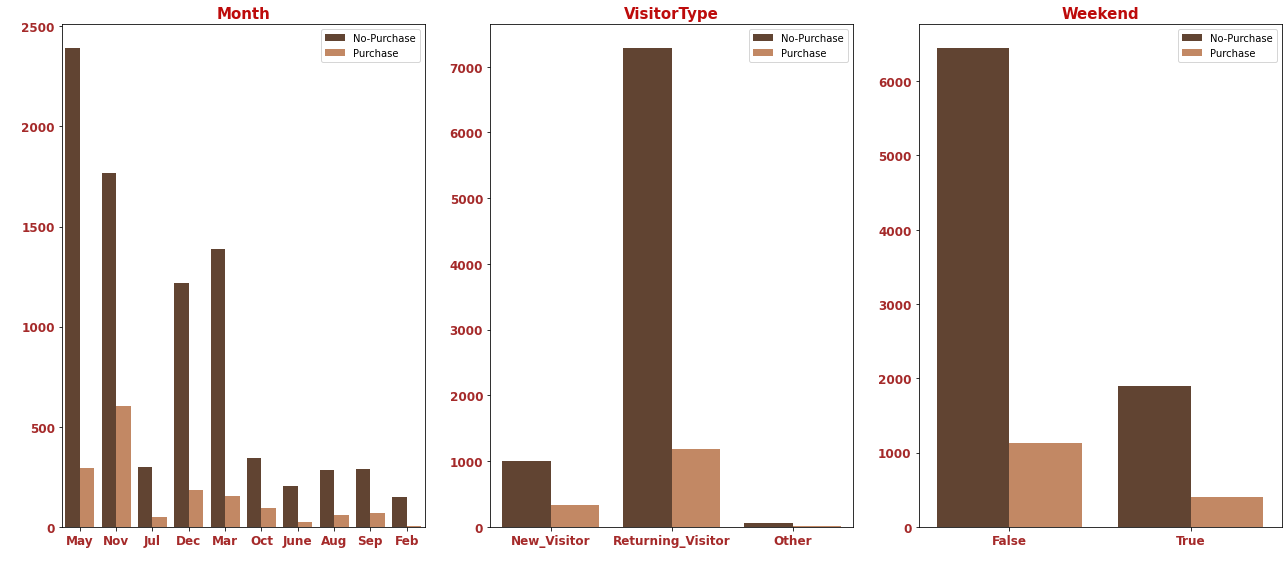

In [9]:
plt.figure(figsize = (18,8))

for i,col in enumerate(categorical):
  plt.subplot(1,3,i+1)
  sns.countplot(x = col,  data = data, palette='copper', hue = 'Revenue' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()


### **Observations:**
- **Maximum Purchase** happens in **November, by returning visitor and non-weekend day.**
- **Maximum Purchase** happens in **Feb, by Other type Visitors and weekend day.**

In [10]:
data.Browser.value_counts()

2     6386
1     1954
4      577
5      369
6      141
10     138
8      105
3       88
13      49
7       43
12      10
11       3
9        1
Name: Browser, dtype: int64

In [11]:
88+49+43+10+3+1

194

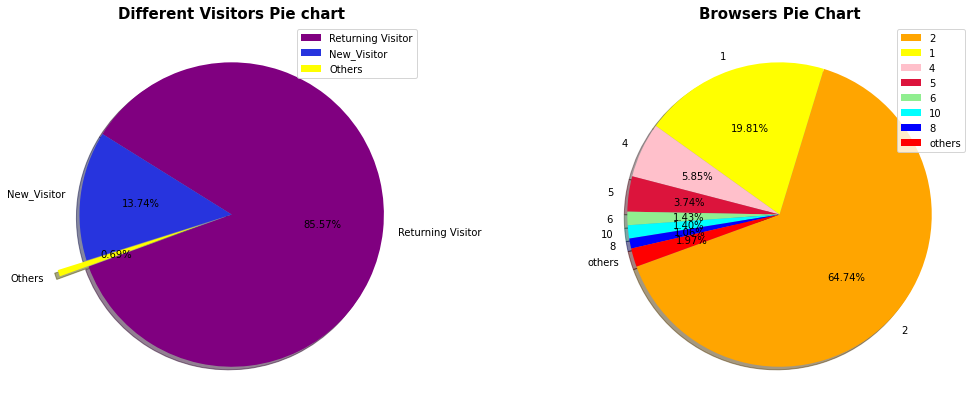

In [12]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['purple', '#2734DE', 'yellow']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.2]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 200)
plt.title('Different Visitors Pie chart', fontsize = 15, fontweight = 'bold')
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [6386, 1954, 577, 369,141, 138, 105,194]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue', 'red']
labels = "2", "1","4","5","6","10","8","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 200)
plt.title('Browsers Pie Chart', fontsize = 15, fontweight = 'bold')
plt.axis('off')
plt.legend(loc = 'best')
plt.show()

In [13]:
len(numerical)

14

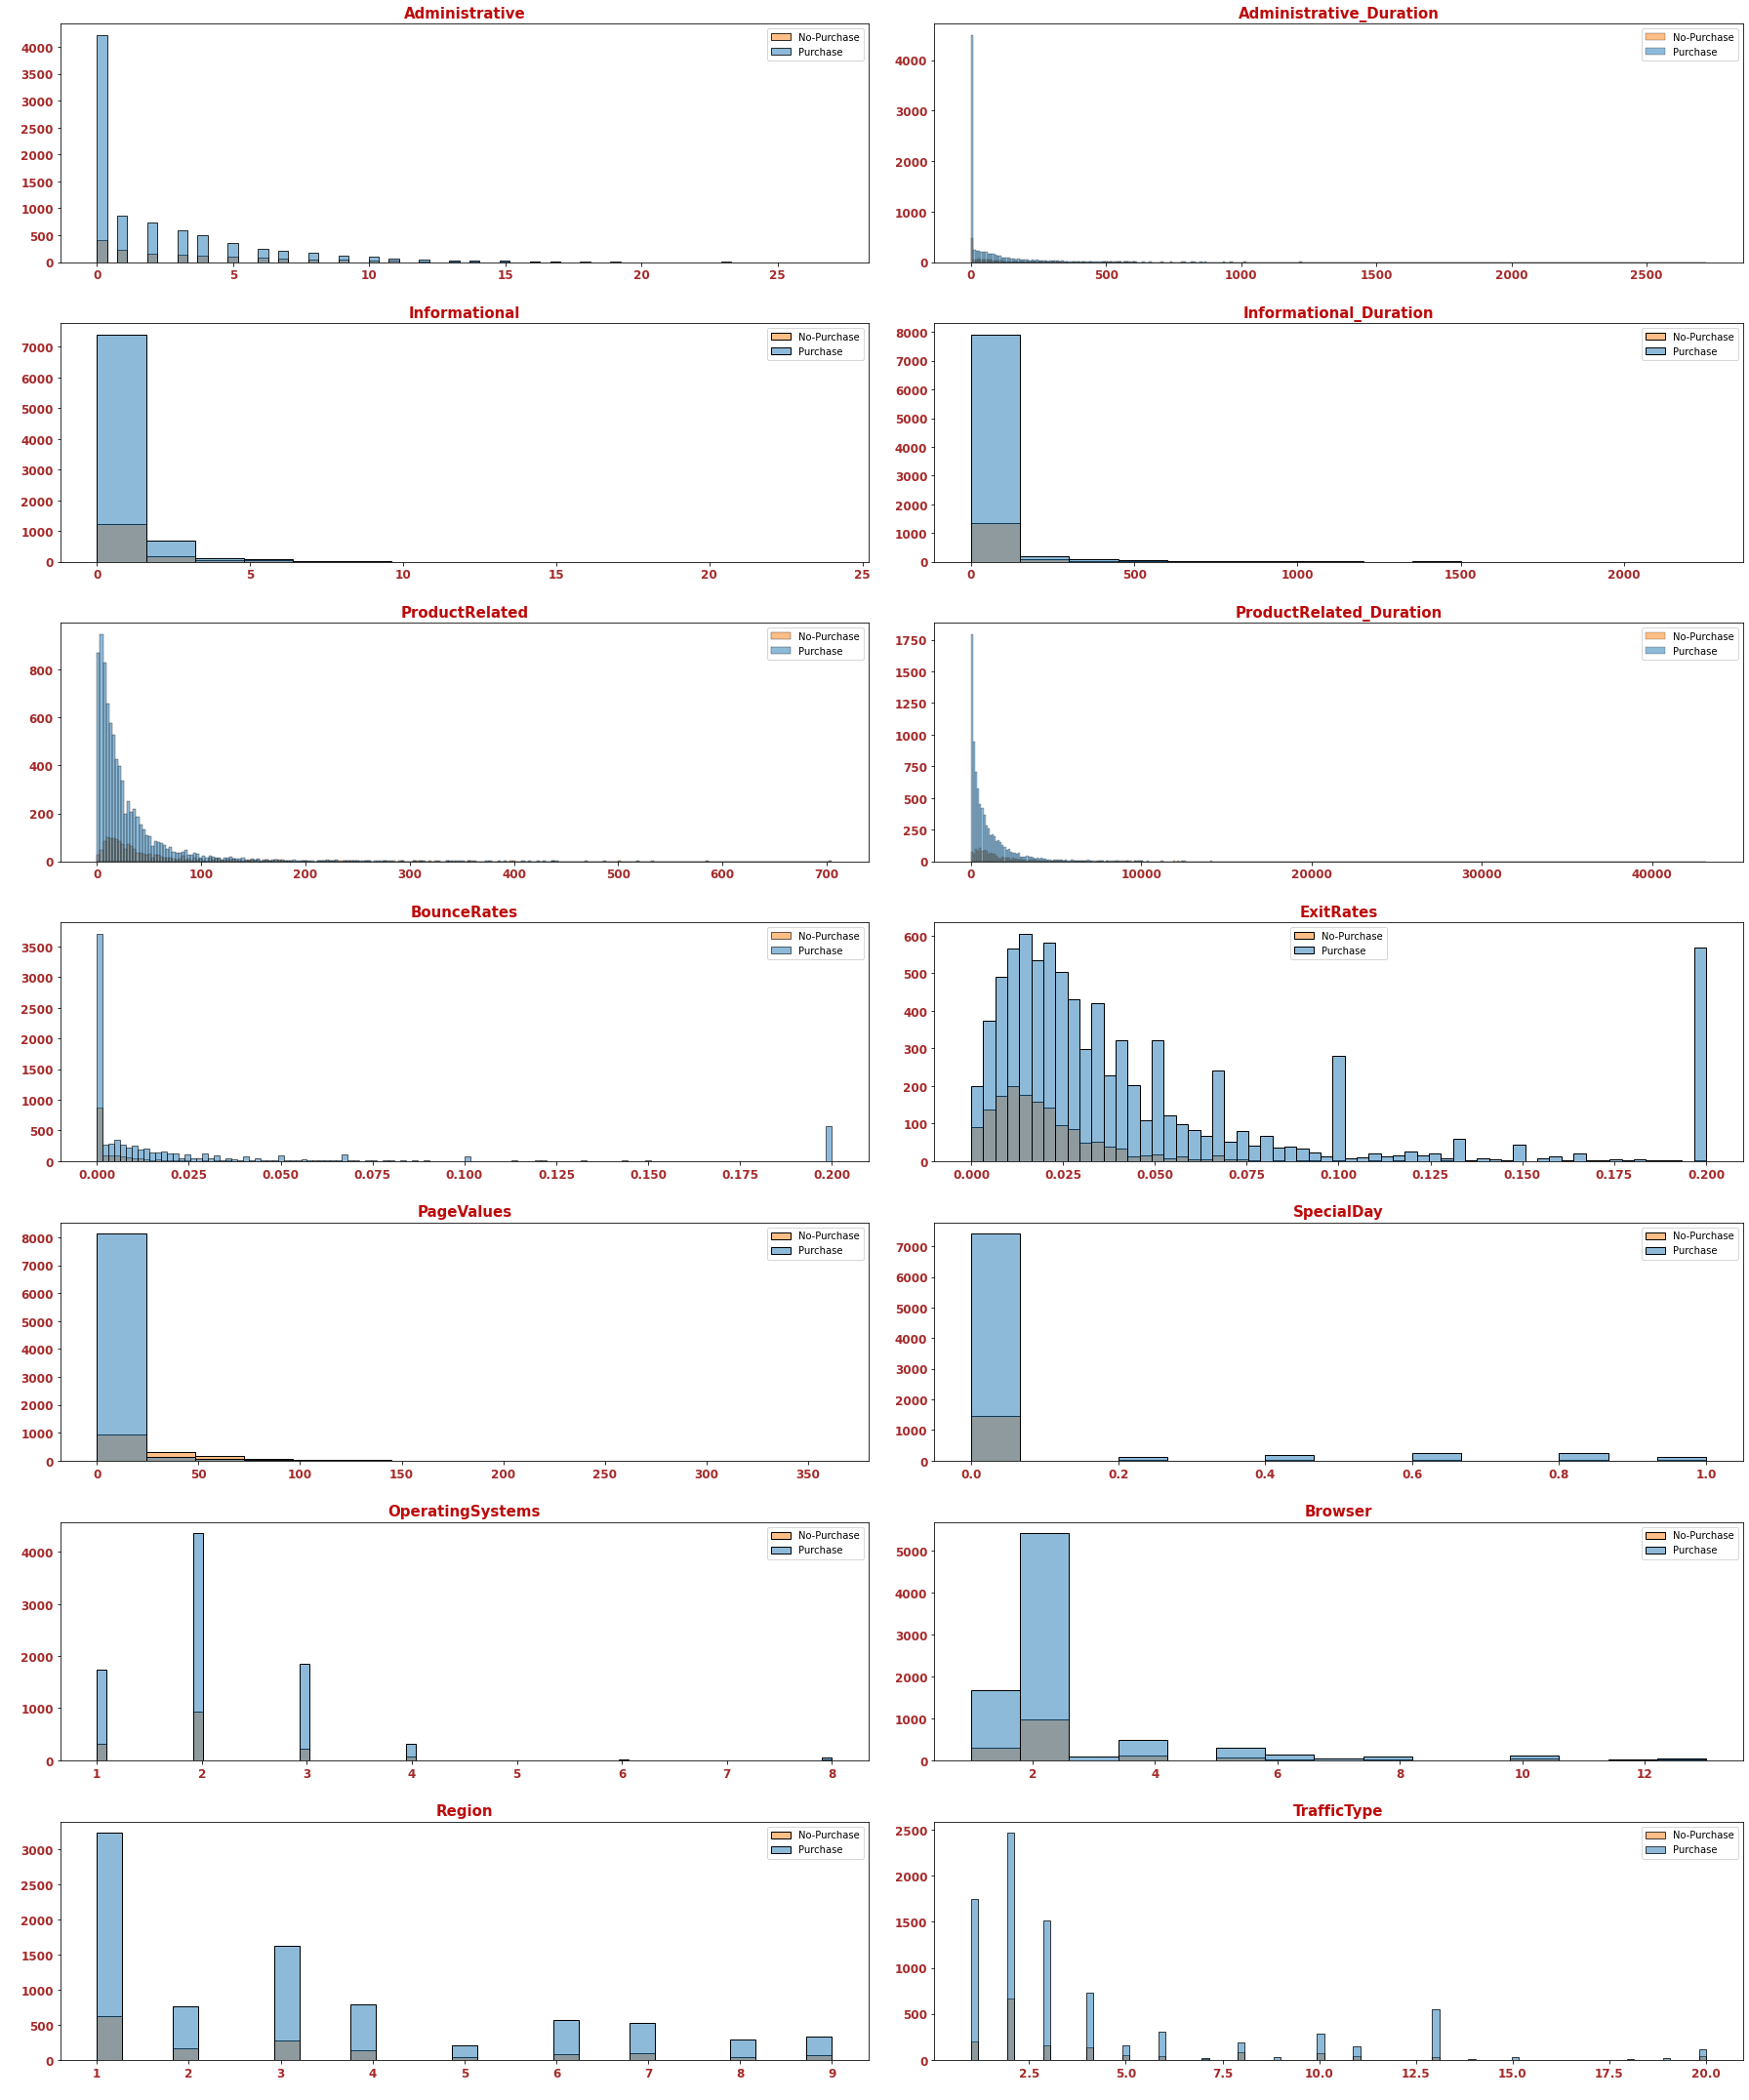

In [14]:
plt.figure(figsize = (25,30))

for i,col in enumerate(numerical):
  plt.subplot(7,2,i+1)
  sns.histplot(x = col,  data = data, hue = 'Revenue' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

### **Observations:**
- Above plots are for the **numerical** columns with hue as **Revenue**
- Clearly many variables are skewed. Applying power transformation or box-cox transformation would take care of the skewed data.

## **Bi-Variate Analysis**

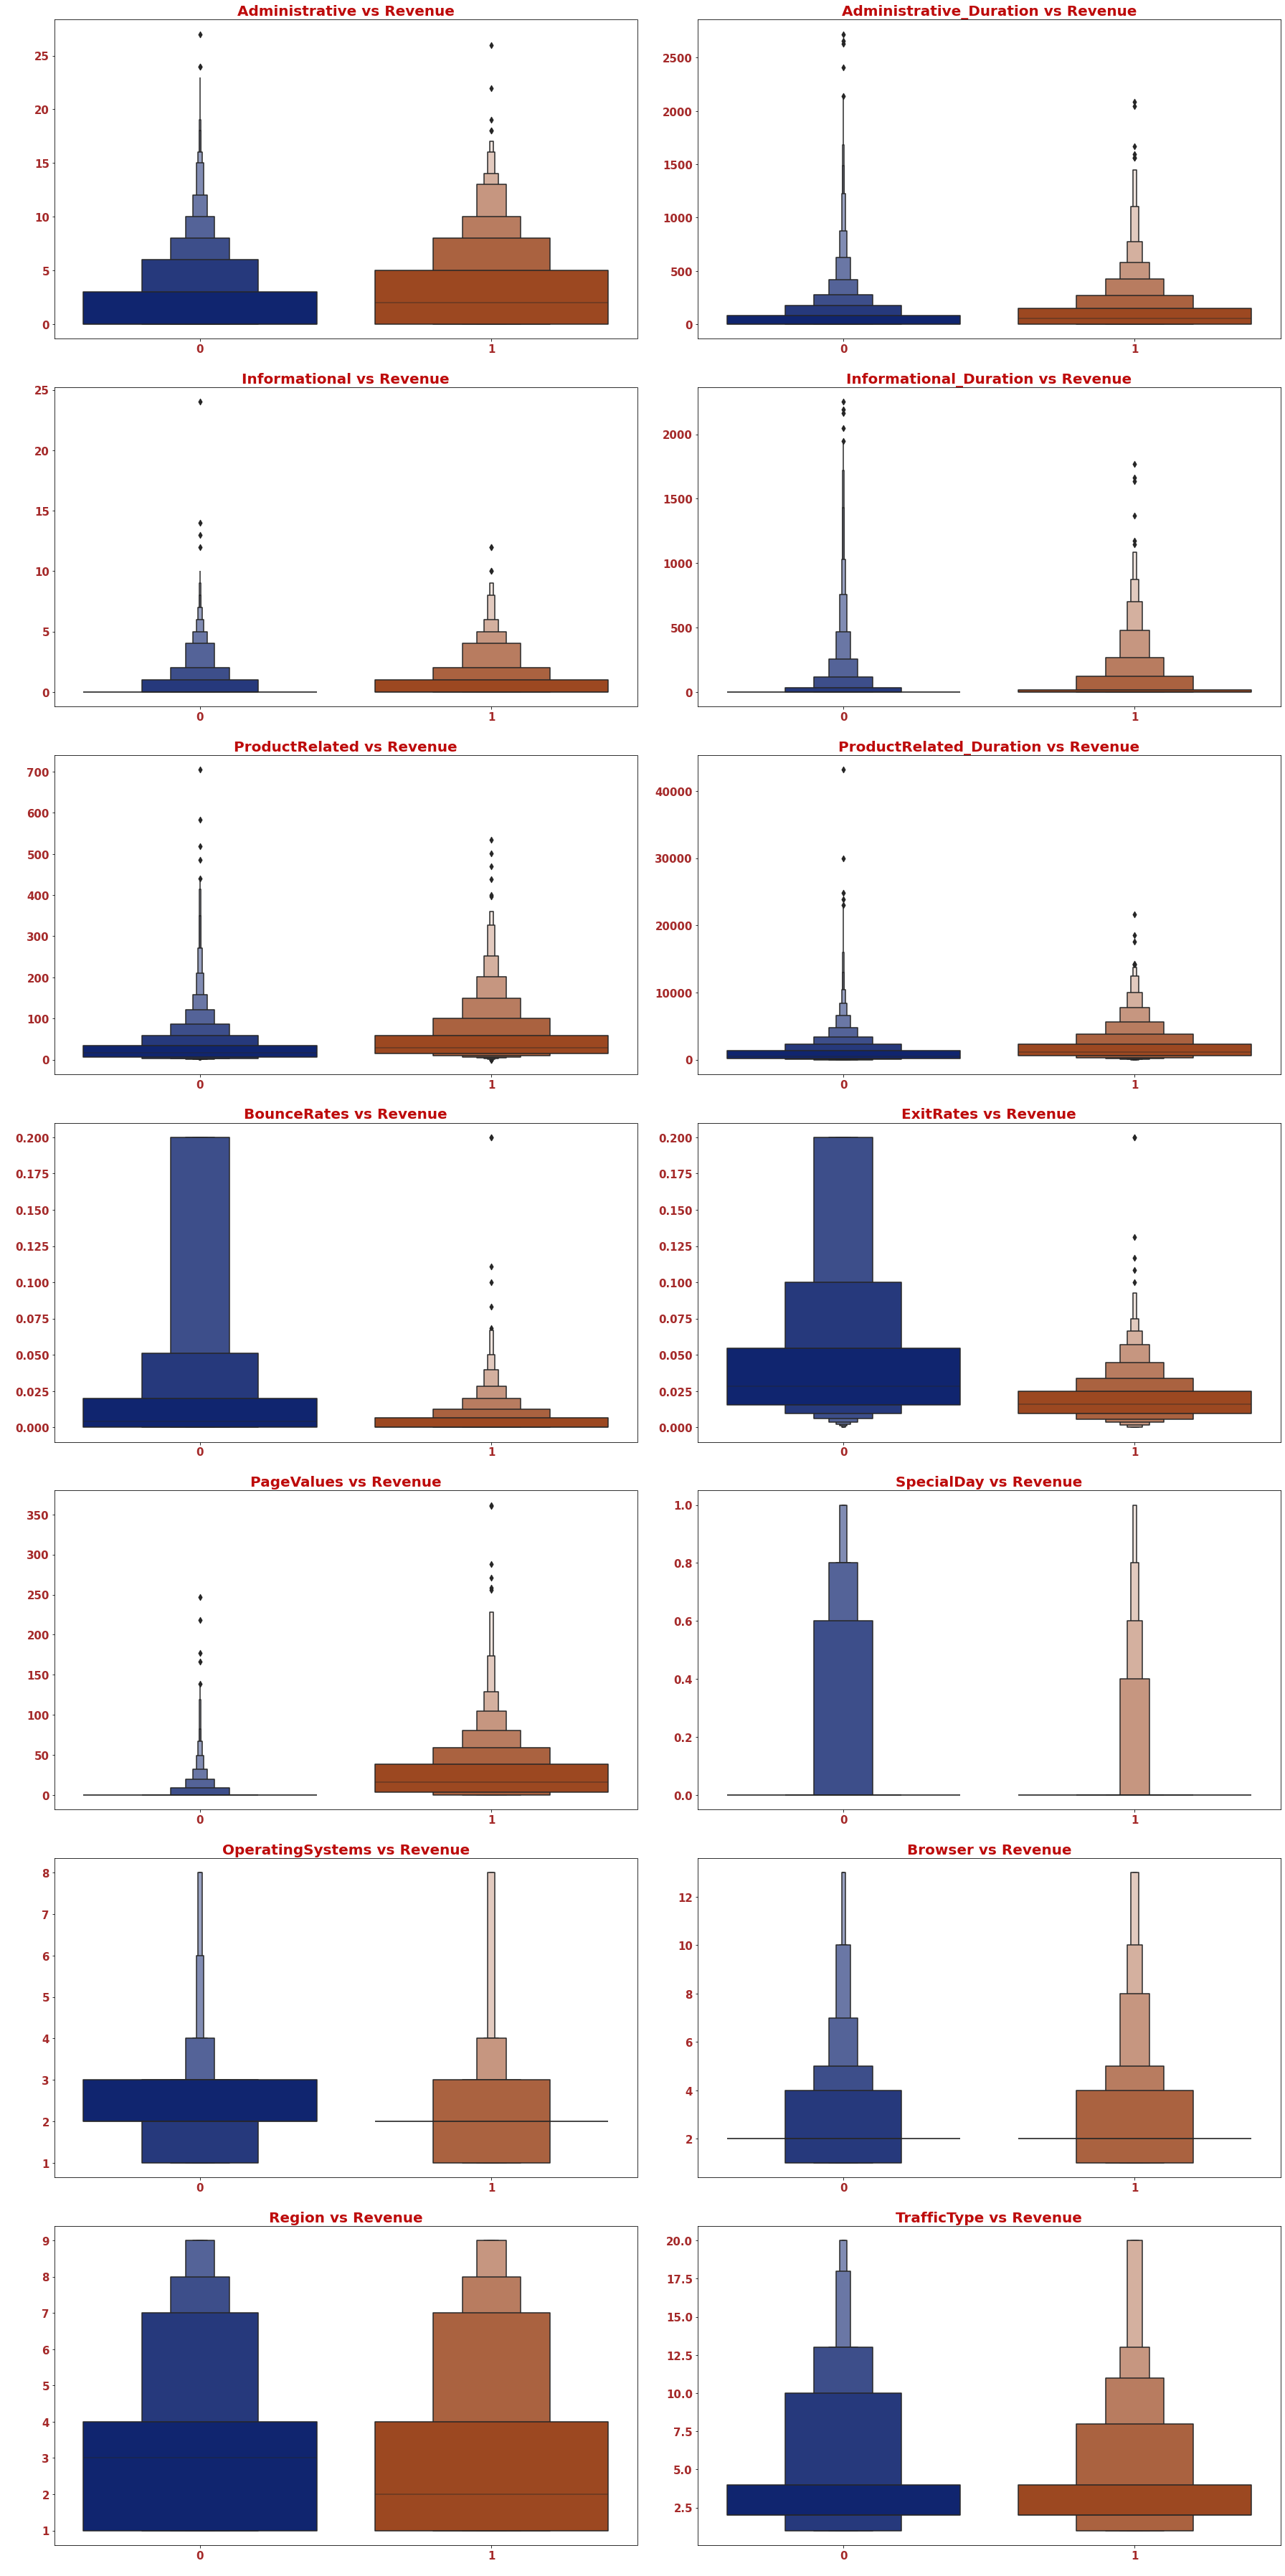

In [15]:
plt.figure(figsize = (25,50))

for i,col in enumerate(numerical):
  plt.subplot(7,2,i+1)
  sns.boxenplot(x = 'Revenue',y = col,  data = data,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Revenue', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

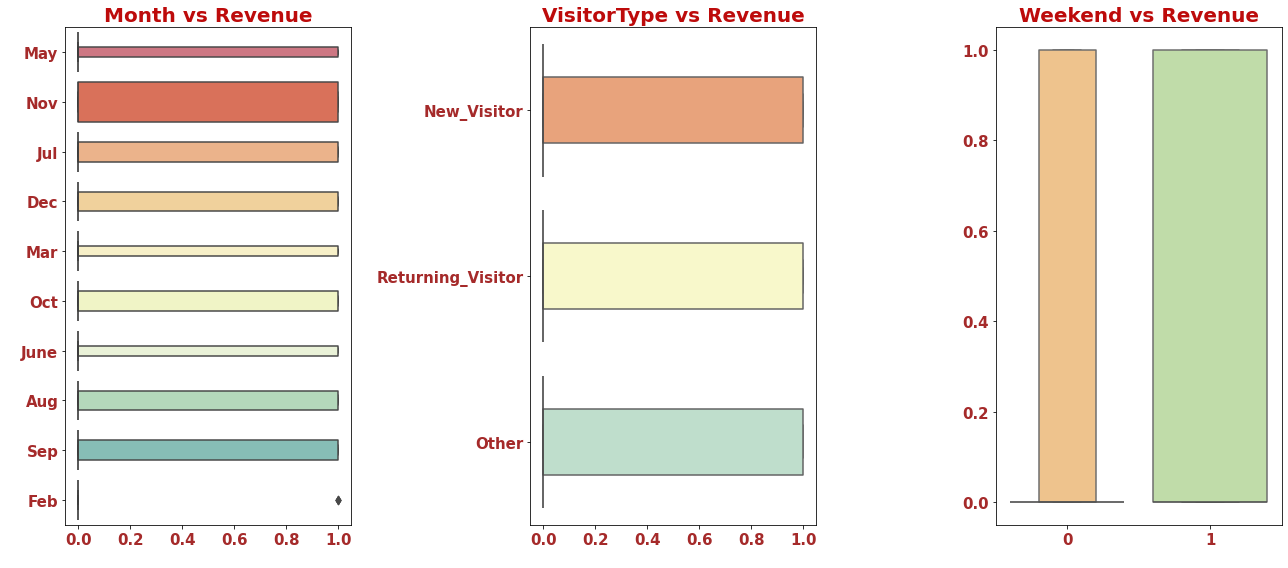

In [16]:
plt.figure(figsize = (18,8))

for i,col in enumerate(categorical):
  plt.subplot(1,3,i+1)
  sns.boxenplot(x = 'Revenue',y = col,  data = data,palette = 'Spectral')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Revenue', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

## **Multi-Variate Analysis**

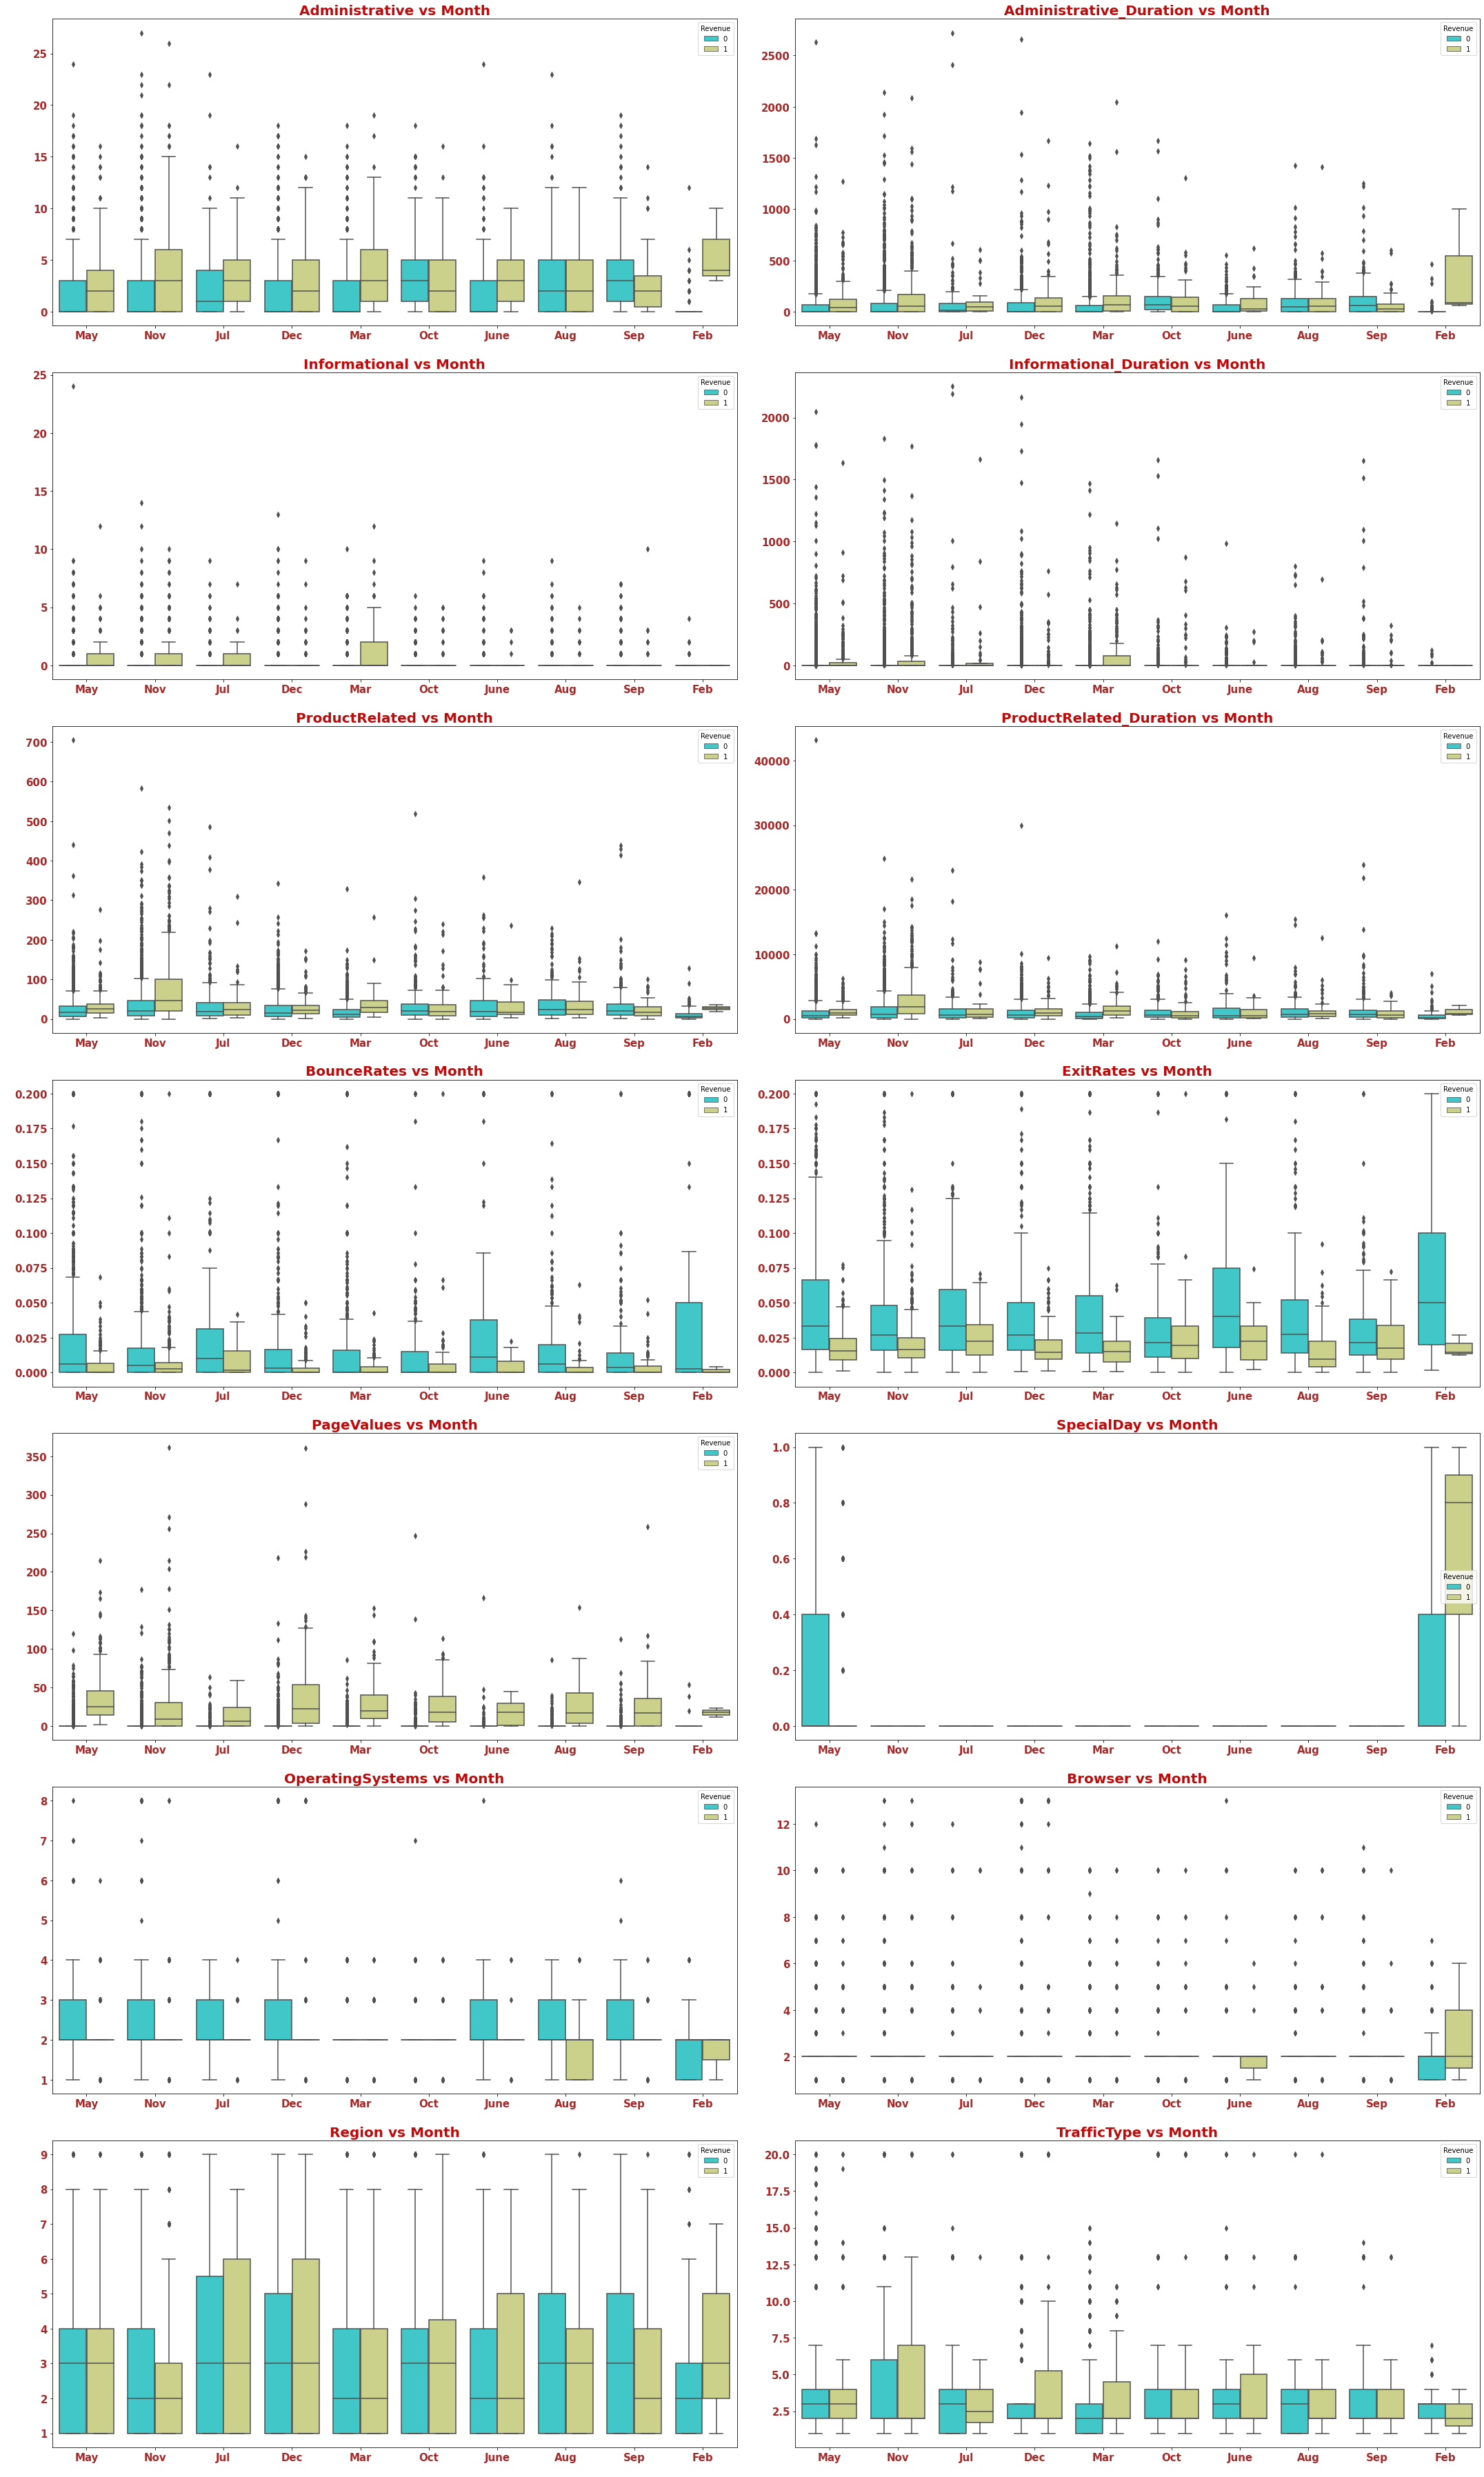

In [17]:
plt.figure(figsize = (30,50))

for i,col in enumerate(numerical):
  plt.subplot(7,2,i+1)
  sns.boxplot(x = 'Month',y = col,  data = data,palette = 'rainbow', hue = 'Revenue')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Month', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();


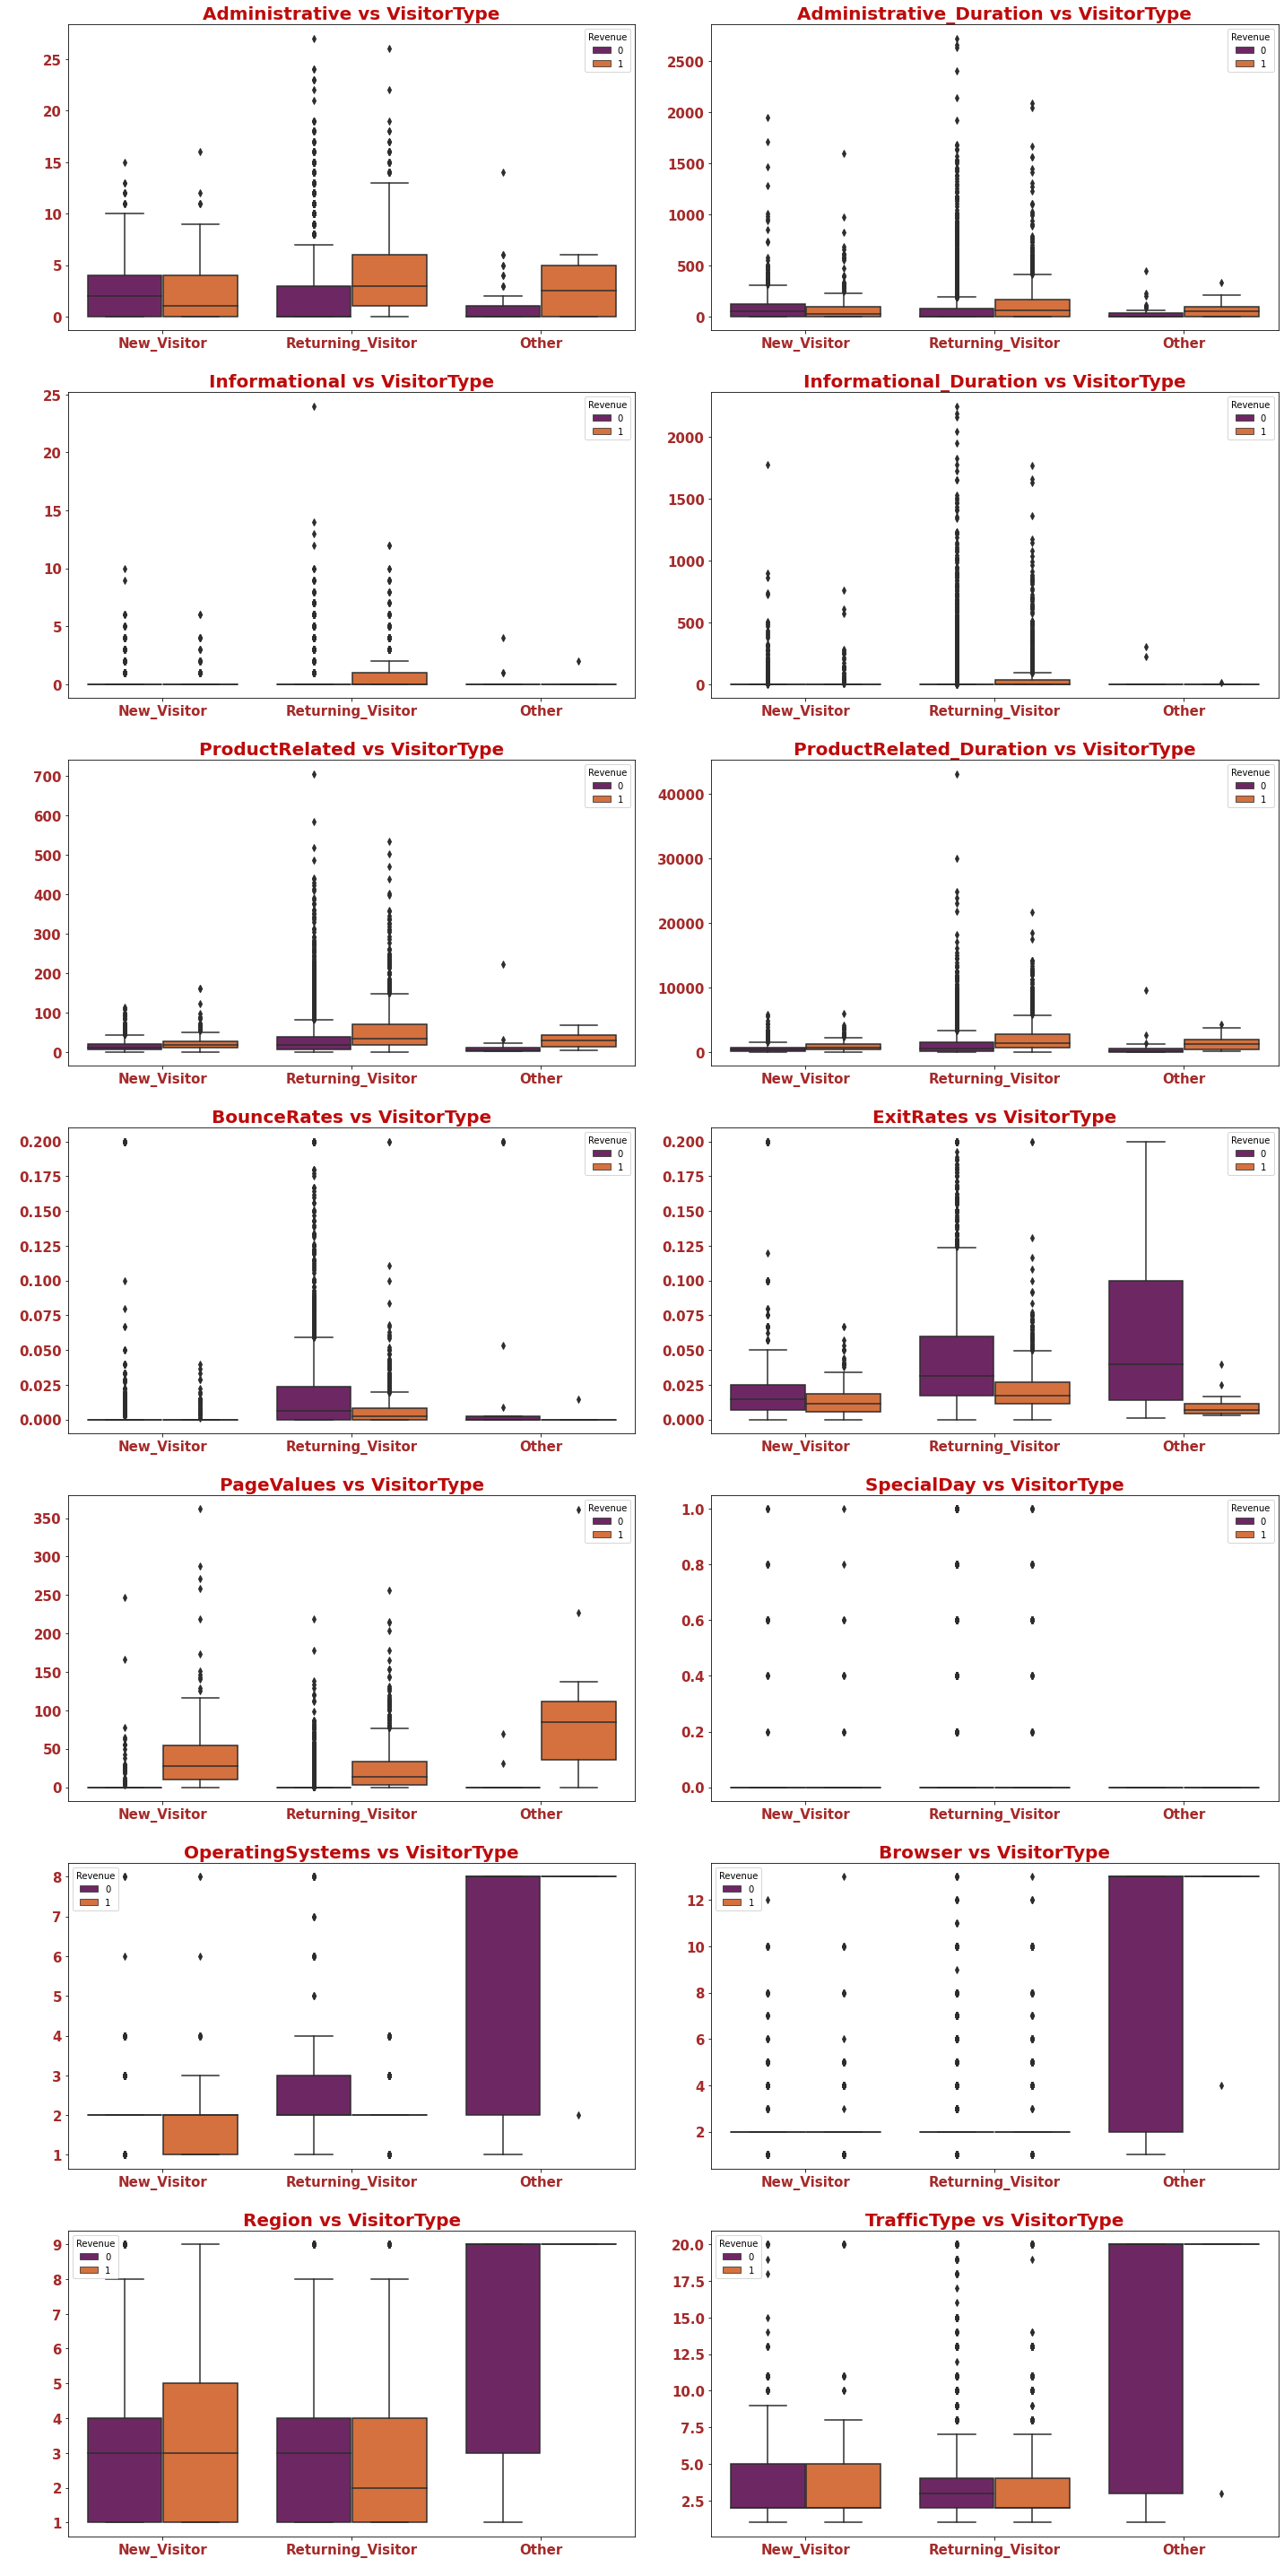

In [18]:
plt.figure(figsize = (20,40))

for i,col in enumerate(numerical):
  plt.subplot(7,2,i+1)
  sns.boxplot(x = 'VisitorType',y = col,  data = data,palette = 'inferno', hue = 'Revenue')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs VisitorType', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();


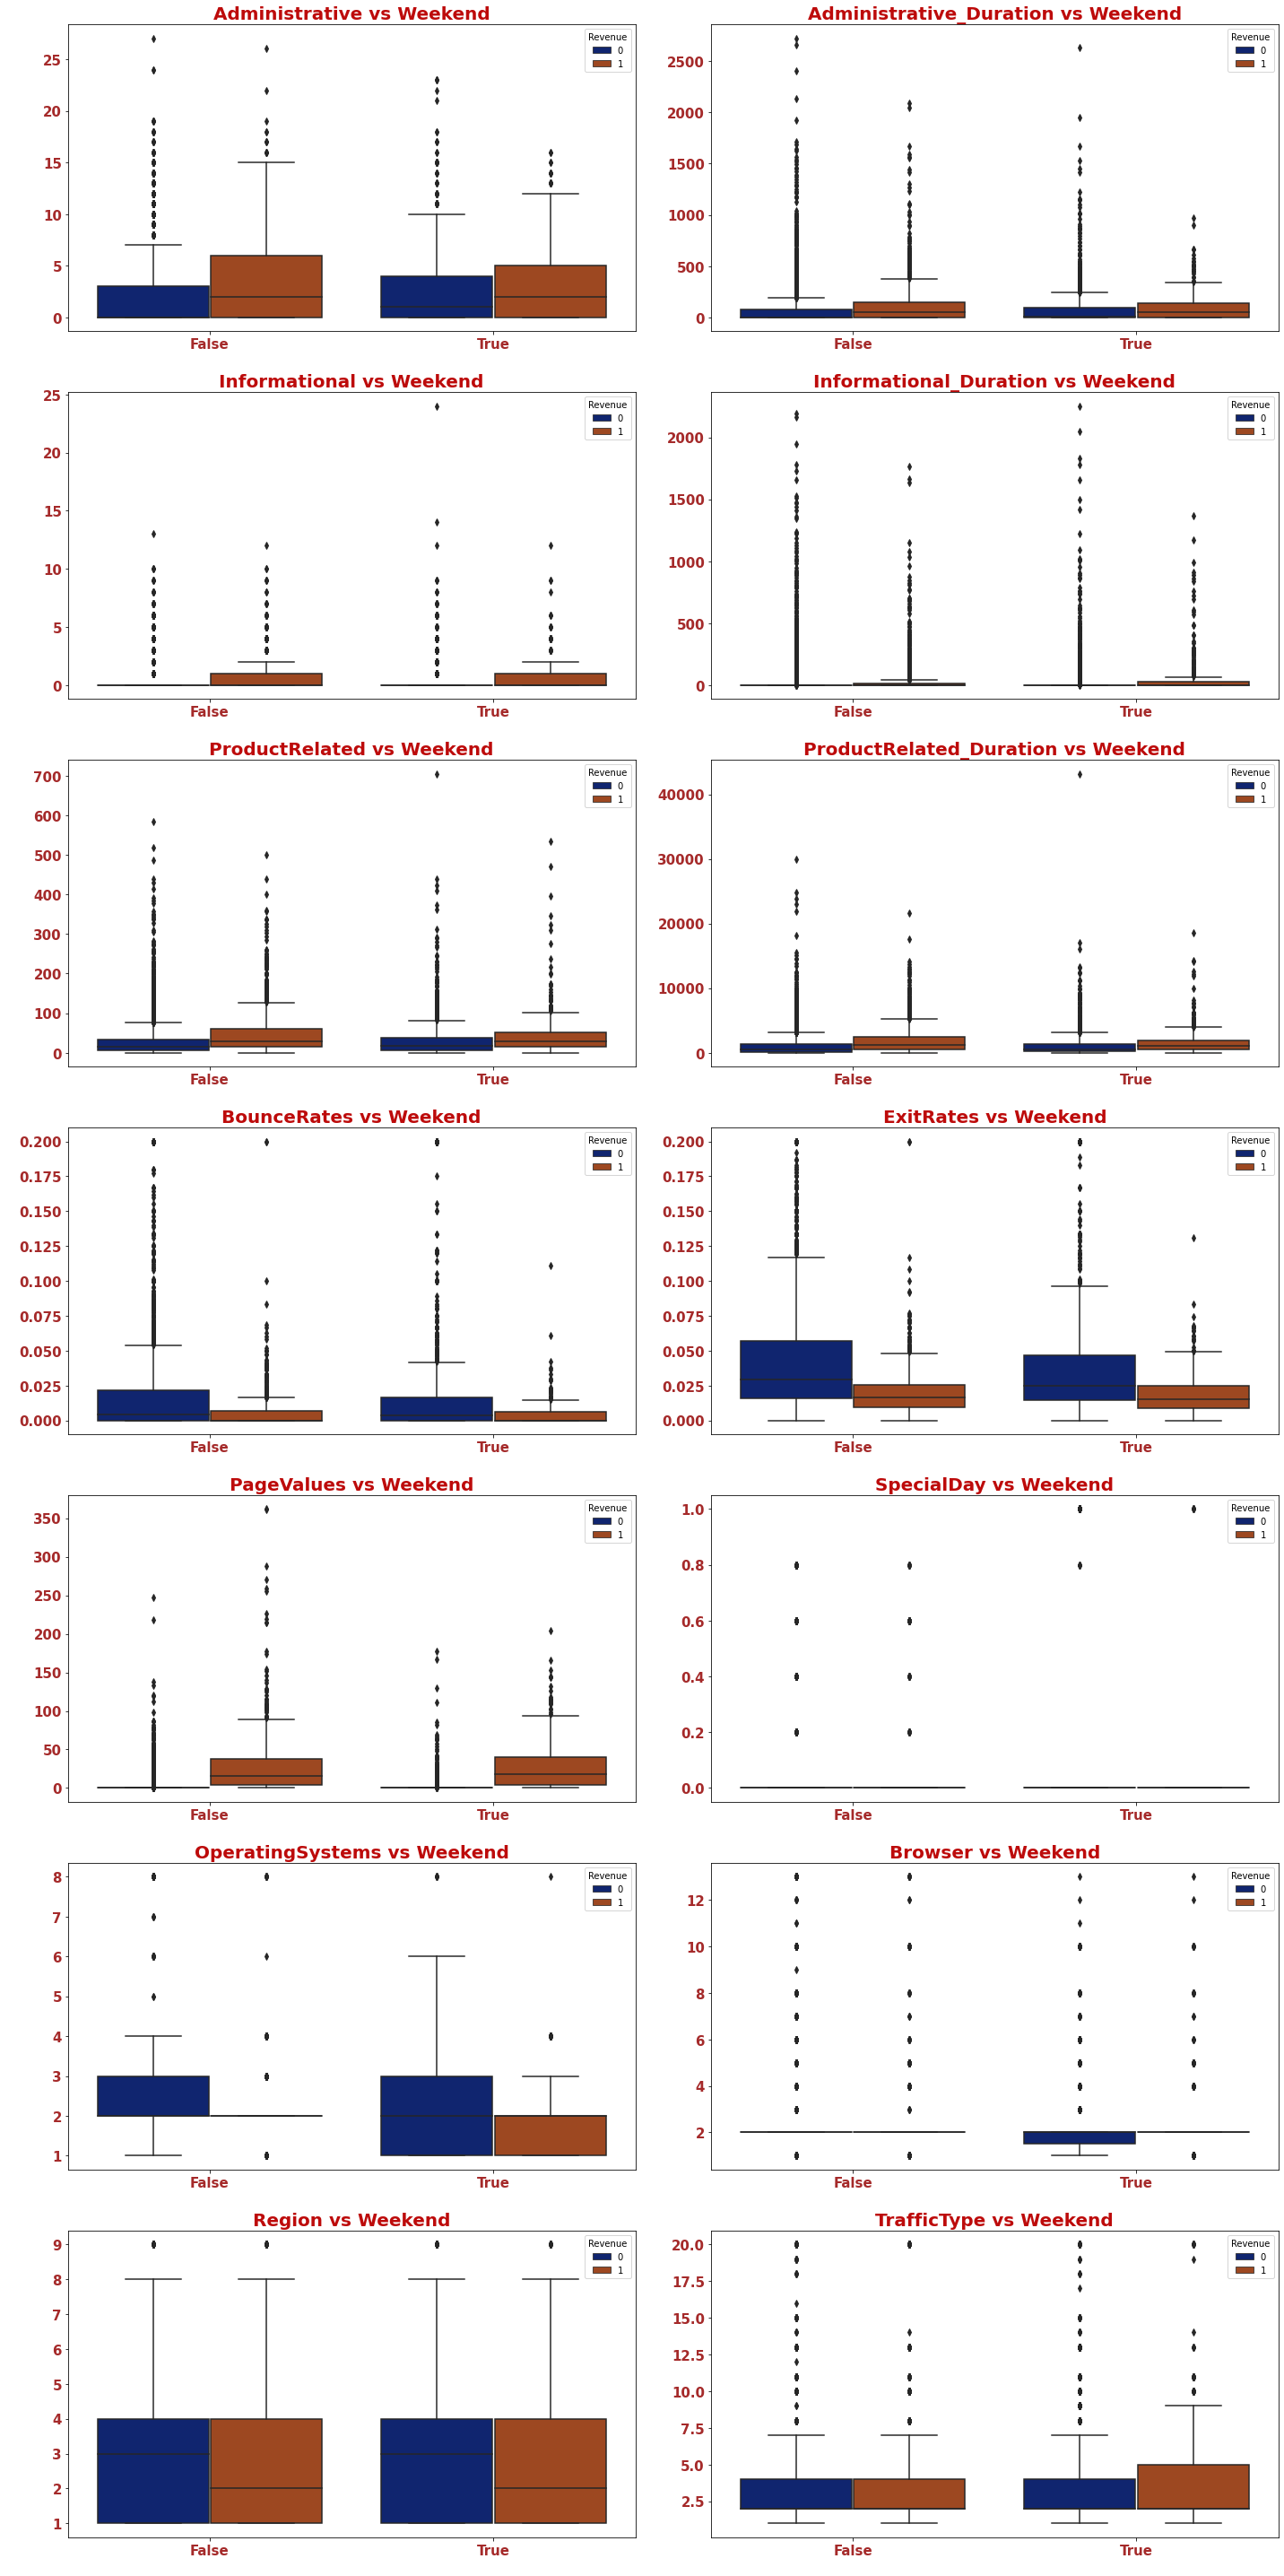

In [19]:
plt.figure(figsize = (20,40))

for i,col in enumerate(numerical):
  plt.subplot(7,2,i+1)
  sns.boxplot(x = 'Weekend',y = col,  data = data,palette = 'dark', hue = 'Revenue')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Weekend', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();


## **Feature Selection using ``feature_selection``**

### **Some Preprocessing**

In [21]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=7)

In [23]:
df_train = pd.get_dummies(data)
df_train.Weekend = df_train.Weekend.apply(lambda x : 1 if x == True else 0)

df_test = pd.get_dummies(df_test)
df_test.Weekend = df_test.Weekend.apply(lambda x : 1 if x == True else 0)


pt = preprocessing.PowerTransformer()
pt_num_tr = pd.DataFrame(pt.fit_transform(df_train[numerical]),columns=numerical)
pt_num_ts = pd.DataFrame(pt.transform(df_test[numerical]),columns=numerical)

df_train = pd.concat([df_train.drop(numerical, axis = 1),pt_num_tr],axis=1)
df_test = pd.concat([df_test.drop(numerical, axis = 1),pt_num_ts],axis=1)

scaler= preprocessing.RobustScaler()

In [25]:
X = df_train.drop('Revenue', axis = 1)
Y = df_train.Revenue
params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
            'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
            'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=i )
  X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  model = LGBMClassifier(**params)
  model.fit(X_train_scaled, y_train)

  train_preds = model.predict(X_train_scaled)
  test_preds = model.predict(X_test_scaled)

  if metrics.accuracy_score(y_train, train_preds) < metrics.accuracy_score(y_test, test_preds):
    print(f"random_state: {i}")
    print(f"{model} is generalized because accuracy_score_test > accuracy_score_train AND accuracy_score_test > CL")
    print(f'accuracy_score_train: {metrics.accuracy_score(y_train, train_preds)}')
    print(f'accuracy_score_test: {metrics.accuracy_score(y_test, test_preds)}')
    print('\n')
    print("Since Model is generalized. Let's check Confusion Matrix and Classification Report")
    print('\n')
    print(f"Classification report of Train Data: \n{metrics.classification_report(y_train, train_preds)}")
    print()
    print(f"Classification report of Test Data: \n{metrics.classification_report(y_test, test_preds)}")
    print('\n')
    print(f"Confusion Matrix of Train Data: \n{metrics.confusion_matrix(y_train, train_preds)}")
    print('\n')
    print(f"Confusion Matrix of Test Data: \n{metrics.confusion_matrix(y_test, test_preds)}")
    print('\n')
    print("="*100)

random_state: 2
LGBMClassifier(colsample_bytree=0.49, learning_rate=0.321, max_depth=96,
               min_child_samples=40, min_child_weight=60, n_estimators=1021,
               num_leaves=72, objective='binary', reg_alpha=21.46548336406527,
               reg_lambda=7.954695942994131, subsample=0.37, subsample_freq=15) is generalized because accuracy_score_test > accuracy_score_train AND accuracy_score_test > CL
accuracy_score_train: 0.9012166859791425
accuracy_score_test: 0.9016891891891892


Since Model is generalized. Let's check Confusion Matrix and Classification Report


Classification report of Train Data: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5836
           1       0.69      0.65      0.67      1068

    accuracy                           0.90      6904
   macro avg       0.81      0.80      0.81      6904
weighted avg       0.90      0.90      0.90      6904


Classification report of Test Data: 
         

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=4 )
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
for i in range(50):
  params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
              'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
              'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}
  model = LGBMClassifier(**params, random_state=i)
  model.fit(X_train_scaled, y_train)
  train_preds = model.predict(X_train_scaled)
  test_preds = model.predict(X_test_scaled)
  print(i)
  print(f'accuracy_score_train: {metrics.accuracy_score(y_train, train_preds)}')
  print(f'accuracy_score_test: {metrics.accuracy_score(y_test, test_preds)}')
  print('\n')
  print(f"Classification report of Train Data: \n{metrics.classification_report(y_train, train_preds)}")
  print()
  print(f"Classification report of Test Data: \n{metrics.classification_report(y_test, test_preds)}")
  print('\n')
  print(f"Confusion Matrix of Train Data: \n{metrics.confusion_matrix(y_train, train_preds)}")
  print('\n')
  print(f"Confusion Matrix of Test Data: \n{metrics.confusion_matrix(y_test, test_preds)}")


0
accuracy_score_train: 0.8960023174971031
accuracy_score_test: 0.9043918918918918


Classification report of Train Data: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5836
           1       0.69      0.60      0.64      1068

    accuracy                           0.90      6904
   macro avg       0.81      0.78      0.79      6904
weighted avg       0.89      0.90      0.89      6904


Classification report of Test Data: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2502
           1       0.71      0.65      0.68       458

    accuracy                           0.90      2960
   macro avg       0.82      0.80      0.81      2960
weighted avg       0.90      0.90      0.90      2960



Confusion Matrix of Train Data: 
[[5544  292]
 [ 426  642]]


Confusion Matrix of Test Data: 
[[2378  124]
 [ 159  299]]
1
accuracy_score_train: 0.8984646581691773
accuracy_score_test

In [28]:
"""RFE: Recursive Feature Elimination."""

params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
            'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
            'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}
model = LGBMClassifier(**params, random_state=4)

print(f"present Model: {model}\n")
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)
print(f"Top-5 Features as per order of X_train.columns shown as 'True': \n{selector.support_}\n")

print(f"Ranked-index of Features. Top two features are marked as 1, order is same as X_train.columns: \n{selector.ranking_}\n")

print(f"X_train.columns: \n{list(X_train_scaled.columns)}\n")

print(f"Top-5 features after RFE: \n{selector.get_feature_names_out()}\n")
print("="*100)



present Model: LGBMClassifier(colsample_bytree=0.49, learning_rate=0.321, max_depth=96,
               min_child_samples=40, min_child_weight=60, n_estimators=1021,
               num_leaves=72, objective='binary', random_state=4,
               reg_alpha=21.46548336406527, reg_lambda=7.954695942994131,
               subsample=0.37, subsample_freq=15)

Top-5 Features as per order of X_train.columns shown as 'True': 
[False False False False False False False False  True False False False
 False False False  True False False  True False  True False  True False
 False False False False]

Ranked-index of Features. Top two features are marked as 1, order is same as X_train.columns: 
[24 23 22 21 20 19 18 17  1 12 11 10  9  8  3  1 14 16  1  7  1  2  1  6
  5  4 13 15]

X_train.columns: 
['Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_R

## **Let's try-out these features** 

In [29]:
important_features = ['Month_Nov' ,'Administrative' ,'Administrative_Duration', 'ProductRelated',
 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
 'Browser', 'Region', 'Revenue']

X = df_train[important_features].drop('Revenue', axis = 1)
Y = df_train.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=17 )
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)



params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
            'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
            'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}
model = LGBMClassifier(**params, random_state=6)
model.fit(X_train_scaled, y_train)
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)
print(f'accuracy_score_train: {metrics.accuracy_score(y_train, train_preds)}')
print(f'accuracy_score_test: {metrics.accuracy_score(y_test, test_preds)}')
print('\n')
print(f"Classification report of Train Data: \n{metrics.classification_report(y_train, train_preds)}")
print()
print(f"Classification report of Test Data: \n{metrics.classification_report(y_test, test_preds)}")
print('\n')
print(f"Confusion Matrix of Train Data: \n{metrics.confusion_matrix(y_train, train_preds)}")
print('\n')
print(f"Confusion Matrix of Test Data: \n{metrics.confusion_matrix(y_test, test_preds)}")


accuracy_score_train: 0.8996234067207416
accuracy_score_test: 0.8989864864864865


Classification report of Train Data: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5836
           1       0.70      0.61      0.65      1068

    accuracy                           0.90      6904
   macro avg       0.82      0.78      0.80      6904
weighted avg       0.90      0.90      0.90      6904


Classification report of Test Data: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2502
           1       0.70      0.60      0.65       458

    accuracy                           0.90      2960
   macro avg       0.82      0.78      0.79      2960
weighted avg       0.89      0.90      0.90      2960



Confusion Matrix of Train Data: 
[[5558  278]
 [ 415  653]]


Confusion Matrix of Test Data: 
[[2387  115]
 [ 184  274]]


## **We see that model is still generalized:**
- Training accuracy = testing accuracy

### **Since data is unbalanced data:**
- We can check f1-score and it seems to be ok for top-10 variables (f1-score_training == f1-score_testing). We can further improve the f1-score by Hyper-parameter tuning 

## **Let's select only top-two variables**

In [30]:
X = df_train.drop('Revenue', axis = 1)
Y = df_train.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=17 )
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

"""RFE: Recursive Feature Elimination."""

params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
            'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
            'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}
model = LGBMClassifier(**params, random_state=6)

print(f"present Model: {model}\n")
selector = RFE(model, n_features_to_select=2, step=1)
selector = selector.fit(X_train_scaled, y_train)
print(f"Top-2 Features as per order of X_train.columns shown as 'True': \n{selector.support_}\n")

print(f"Ranked-index of Features. Top two features are marked as 1, order is same as X_train.columns: \n{selector.ranking_}\n")

print(f"X_train.columns: \n{list(X_train_scaled.columns)}\n")

print(f"Top-2 features after RFE: \n{selector.get_feature_names_out()}\n")
print("="*100)



present Model: LGBMClassifier(colsample_bytree=0.49, learning_rate=0.321, max_depth=96,
               min_child_samples=40, min_child_weight=60, n_estimators=1021,
               num_leaves=72, objective='binary', random_state=6,
               reg_alpha=21.46548336406527, reg_lambda=7.954695942994131,
               subsample=0.37, subsample_freq=15)

Top-2 Features as per order of X_train.columns shown as 'True': 
[False False False False False False False False  True False False False
 False False False False False False False False False False  True False
 False False False False]

Ranked-index of Features. Top two features are marked as 1, order is same as X_train.columns: 
[27 26 25 24 23 22 21 17  1 16 15 14 13 12  7  4 19 20  2  5  6  3  1 11
 10  9  8 18]

X_train.columns: 
['Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_R

### **Let's try out these two features for model building**

In [31]:
important_features = ['Month_Nov' ,'PageValues', 'Revenue']

X = df_train[important_features].drop('Revenue', axis = 1)
Y = df_train.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=17 )
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)



params = {'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 96, 'learning_rate': 0.321, 
            'n_estimators': 1021, 'reg_alpha': 21.46548336406527, 'reg_lambda': 7.954695942994131,
            'subsample': 0.37, 'subsample_freq': 15, 'colsample_bytree': 0.49, 'min_child_samples': 40, 'min_child_weight': 60}
model = LGBMClassifier(**params, random_state=6)
model.fit(X_train_scaled, y_train)
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)
print(f'accuracy_score_train: {metrics.accuracy_score(y_train, train_preds)}')
print(f'accuracy_score_test: {metrics.accuracy_score(y_test, test_preds)}')
print('\n')
print(f"Classification report of Train Data: \n{metrics.classification_report(y_train, train_preds)}")
print()
print(f"Classification report of Test Data: \n{metrics.classification_report(y_test, test_preds)}")
print('\n')
print(f"Confusion Matrix of Train Data: \n{metrics.confusion_matrix(y_train, train_preds)}")
print('\n')
print(f"Confusion Matrix of Test Data: \n{metrics.confusion_matrix(y_test, test_preds)}")


accuracy_score_train: 0.8955677867902665
accuracy_score_test: 0.8989864864864865


Classification report of Train Data: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5836
           1       0.66      0.68      0.67      1068

    accuracy                           0.90      6904
   macro avg       0.80      0.81      0.80      6904
weighted avg       0.90      0.90      0.90      6904


Classification report of Test Data: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2502
           1       0.68      0.67      0.67       458

    accuracy                           0.90      2960
   macro avg       0.81      0.80      0.81      2960
weighted avg       0.90      0.90      0.90      2960



Confusion Matrix of Train Data: 
[[5462  374]
 [ 347  721]]


Confusion Matrix of Test Data: 
[[2356  146]
 [ 153  305]]


## **We see that model is still generalized:**
- Training accuracy == testing accuracy

### **Since data is unbalanced data:**
- Also f1-score seems to be ok for top-2 variables (f1-score_training == f1-score_testing). 
- We can further improve the f1-score by Hyper-parameter tuning 


## **Hyper-Parameter tuning and various model-buliding are in different notebook.**